# Tests on Buzzard Y3x2pt mock data-vector  

Here we will plot and compare the results from WLPipe to 2pt_pipeline data-vector.

- ```y3buzz_dvect.fits``` (from WLpipe)
- ```Buzz3x2_pixellized_BPZbinstack.fits``` (from https://github.com/des-science/y3-cosmic-shear/blob/master/code/Buzzard/y3_buzzard_BPZcut_zstack_2pt_NG_cov.fits)


In [1]:
import sys
from astropy.table import Table as tbl
from matplotlib import pyplot as plt
import numpy as np
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

In [2]:
def get_fits(path, filename, hdu):
    """
    Read the data vector as astropy.table
    """
    fitstable = tbl.read(path + filename, hdu=hdu)
    fitsbin1 = np.unique(fitstable['BIN1'])
    fitsbin2 = np.unique(fitstable['BIN2']) 
    return fitstable, fitsbin1, fitsbin2

In [26]:
#Loading the data
wlpipe_outpath    = '/Users/maria/current-work/wlpipe/buzzard_sims/'
desy3buzz_outpath = '/Users/maria/current-work/wlpipe/buzzard_sims/'
    
wlpipe_filename    = 'y3buzz_dvect.fits'                        # WLPipe - version of May 24
desy3buzz_filename = 'y3_buzzard_BPZcut_zstack_2pt_NG_cov.fits' # 'buzzard_y3_3x2_th_new.fits' #2pt_pipeline

#Loading theory data-vector

th_filename  = 'maria_smaxlike_y3buzzJim.fits' #'buzzard_y3_3x2_th_new.fits' #'maria_stest_y3buzz.fits'     #'maria_stest_buzzard_y3_3x2_th_new.fits'      # 
th2_filename = 'maria_smaxlike_y3buzz.fits'  #'maria_smaxlike_buzzard_y3_3x2_th_new.fits'   # 

In [27]:
#Getting the covariances
desy3buzz_cov_filename = get_pkg_data_filename(desy3buzz_outpath + desy3buzz_filename )
fits.info(desy3buzz_cov_filename)
desy3buzz_cov = fits.getdata(desy3buzz_cov_filename, hdu=1)

print
wlpipe_cov_filename = get_pkg_data_filename(wlpipe_outpath + wlpipe_filename )
fits.info(wlpipe_cov_filename)
wlpipe_cov = fits.getdata(wlpipe_cov_filename, hdu=1)

print
th_cov_filename = get_pkg_data_filename(wlpipe_outpath + th_filename )
fits.info(th_cov_filename)

print
th2_cov_filename = get_pkg_data_filename(wlpipe_outpath + th2_filename )
fits.info(th2_cov_filename)


Filename: /Users/maria/current-work/wlpipe/buzzard_sims/y3_buzzard_BPZcut_zstack_2pt_NG_cov.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        17   (900, 900)   float64   
  2  xip           1 BinTableHDU     31   200R x 6C   [K, K, K, D, D, D]   
  3  xim           1 BinTableHDU     31   200R x 6C   [K, K, K, D, D, D]   
  4  gammat        1 BinTableHDU     31   400R x 6C   [K, K, K, D, D, D]   
  5  wtheta        1 BinTableHDU     31   100R x 6C   [K, K, K, D, D, D]   
  6  nz_source     1 BinTableHDU     32   400R x 7C   [D, D, D, D, D, D, D]   
  7  nz_lens       1 BinTableHDU     31   400R x 8C   [D, D, D, D, D, D, D, D]   

Filename: /Users/maria/current-work/wlpipe/buzzard_sims/y3buzz_dvect.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        17   (900, 900)   float64   
  2  

Buzzard data-vector covariance:


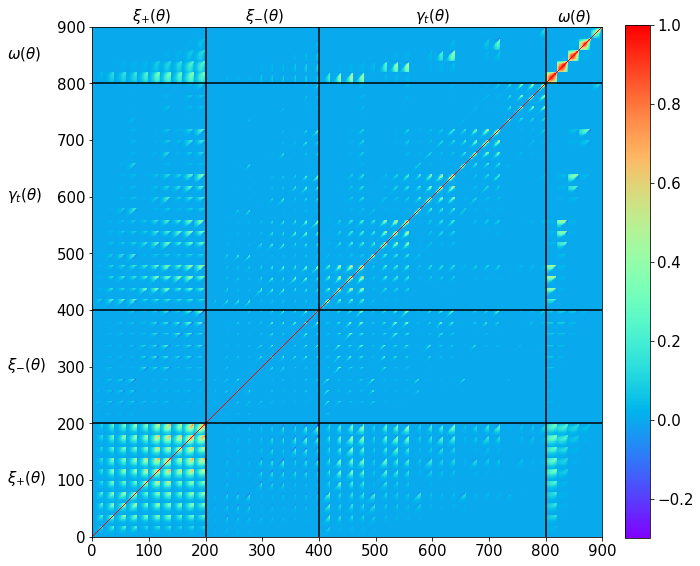

WLPipe data-vector covariance:


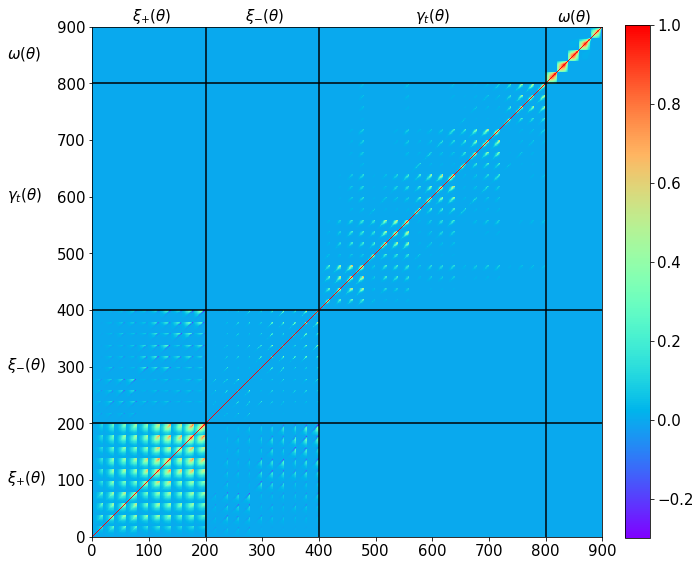

In [25]:
#Plotting the correlation matrix

def plot_cov(cov, savename):
    fig = plt.figure(figsize=(10,10))

    D = np.diag(np.sqrt(np.diagonal(cov)))
    Dinv = np.linalg.inv(D)
    corr =  np.dot(Dinv, np.dot(cov, Dinv))

    im = plt.imshow(corr, vmin=-0.3, vmax=1, cmap=plt.cm.get_cmap("rainbow"))

    cbar = fig.colorbar(im,fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=15)
    plt.axhline(800, color='k')
    plt.axhline(400, color='k')
    plt.axhline(200, color='k')
    plt.axvline(800, color='k')
    plt.axvline(400, color='k')
    plt.axvline(200, color='k')
    plt.xlim(0,900)
    plt.ylim(0,900) #change the diagonal direction in the plot
    plt.text(70, 910, '$\\xi_{+}(\\theta)$', fontsize=15)
    plt.text(270, 910, '$\\xi_{-}(\\theta)$', fontsize=15)
    plt.text(570, 910, '$\\gamma_{t}(\\theta)$', fontsize=15)
    plt.text(820, 910, '$\\omega(\\theta)$', fontsize=15)
    plt.text(-150, 95, '$\\xi_{+}(\\theta)$', fontsize=15)
    plt.text(-150, 295, '$\\xi_{-}(\\theta)$', fontsize=15)
    plt.text(-150, 595, '$\\gamma_{t}(\\theta)$', fontsize=15)
    plt.text(-150, 845, '$\\omega(\\theta)$', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig(savename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()
    

print('Buzzard data-vector covariance:')     
plot_cov(desy3buzz_cov, 'y3buzz_NG_covariance_2pt_pipeline.png')

print('WLPipe data-vector covariance:')     
plot_cov(wlpipe_cov, 'y3buzz_G_covariance_WLpipe.png')

In [28]:
def get_xi_values(dvect, xi_bin, idxs):
    """
    Get the :math:`\\xi` values for each tomographic bin.
    """
    idx1, idx2 = idxs    
    msk   = (dvect['BIN1']==xi_bin[idx1])&(dvect['BIN2']==xi_bin[idx2])
    ang   = dvect['ANG'][msk]
    value = dvect['VALUE'][msk]
    rbin = (xi_bin[idx1], xi_bin[idx2])
    return ang, value, rbin, msk

def plot_xi(dvect1, dvect2, xi_bin, nrow, nidx, bins, ylabel, legend, outname, cov1, cov2, dvect3, dvect4):
    """
    Plot the shear-shear :math:`xi` comparison between the 2pt_pipeline and
    WLpipe.
    """
    
    plt.figure(1, figsize=(28,22))
    for i in range(len(bins)):
        angle1, value1, rbin, msk1 = get_xi_values(dvect1, xi_bin, bins[i])
        angle2, value2, rbin, _ = get_xi_values(dvect2, xi_bin, bins[i])
        angle3, value3, rbin3, _ = get_xi_values(dvect3, xi_bin, bins[i])
        angle4, value4, rbin4, _ = get_xi_values(dvect4, xi_bin, bins[i])
                
        cov1_masked = cov1[msk1]
        cov1_masked = cov1[:, msk1]
        cov1_masked = np.diag(cov1_masked)
        err1 = np.sqrt(cov1_masked)
 
        plt.subplot(nrow, nrow, nidx[i])     # two row, two columns, position 1
        if nidx[i]==11:
            plt.axis('off')
            plt.xlim(1e0, 300)
            plt.ylim(1e-8, 2e-4)
            plt.text(2, 5e-5, legend, fontsize=25)
            plt.text(2, 5e-5, 'blue line = y3_buzzard_BPZcut_zstack_2pt_NG_cov.fits', color='C0', fontsize=25)
            #plt.text(2, 3e-5, 'red line = buzzard_y3_3x2_th_new.fits', color='C3', fontsize=25) 
            #plt.text(2, 5e-5, 'blue line = buzzard_y3_3x2_th_new.fits', color='C0', fontsize=25)
            plt.text(2, 3e-5, 'red line = maria_smaxlike', color='C3', fontsize=25)                      
        else:            
            #plt.errorbar(angle1, value1, yerr=err1, lw=2.5, capsize=5)    # buzzard lw=2.5
            plt.plot(angle1, value1, lw=3.5, ls='-')#, dashes=(5, 5))
            plt.plot(angle2, value2, 'ko', mew=2, ms=12, mfc='None') #ms=12
            plt.plot(angle3, value3, lw=3.5, c='C3', ls='-')#, dashes=(5, 3))
            #plt.plot(angle4, value4, lw=4.5, c='k', ls='--', dashes=(5, 5)) #5,10
            plt.xlim(1e0, 300)
            plt.ylim(1e-8, 2e-4)
            plt.yscale('log', nonposy='clip' ) #nonposy='clip' or 'mask'
            plt.xscale('log', nonposx='mask')
            plt.text(1e2, 5e-5,'%d, %d'%(rbin[0],rbin[1]), fontsize=25)
            plt.xlabel(r'$\theta$' + ' (arcmin)', fontsize=15)
            plt.ylabel(ylabel, fontsize=15) #(r'$\xi_{+}(\theta)$', fontsize=15)
            plt.tick_params(which='major', length=6, width=1, labelsize=15)
            plt.tick_params(which='minor', length=4, width=1)
    plt.savefig(outname, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

    

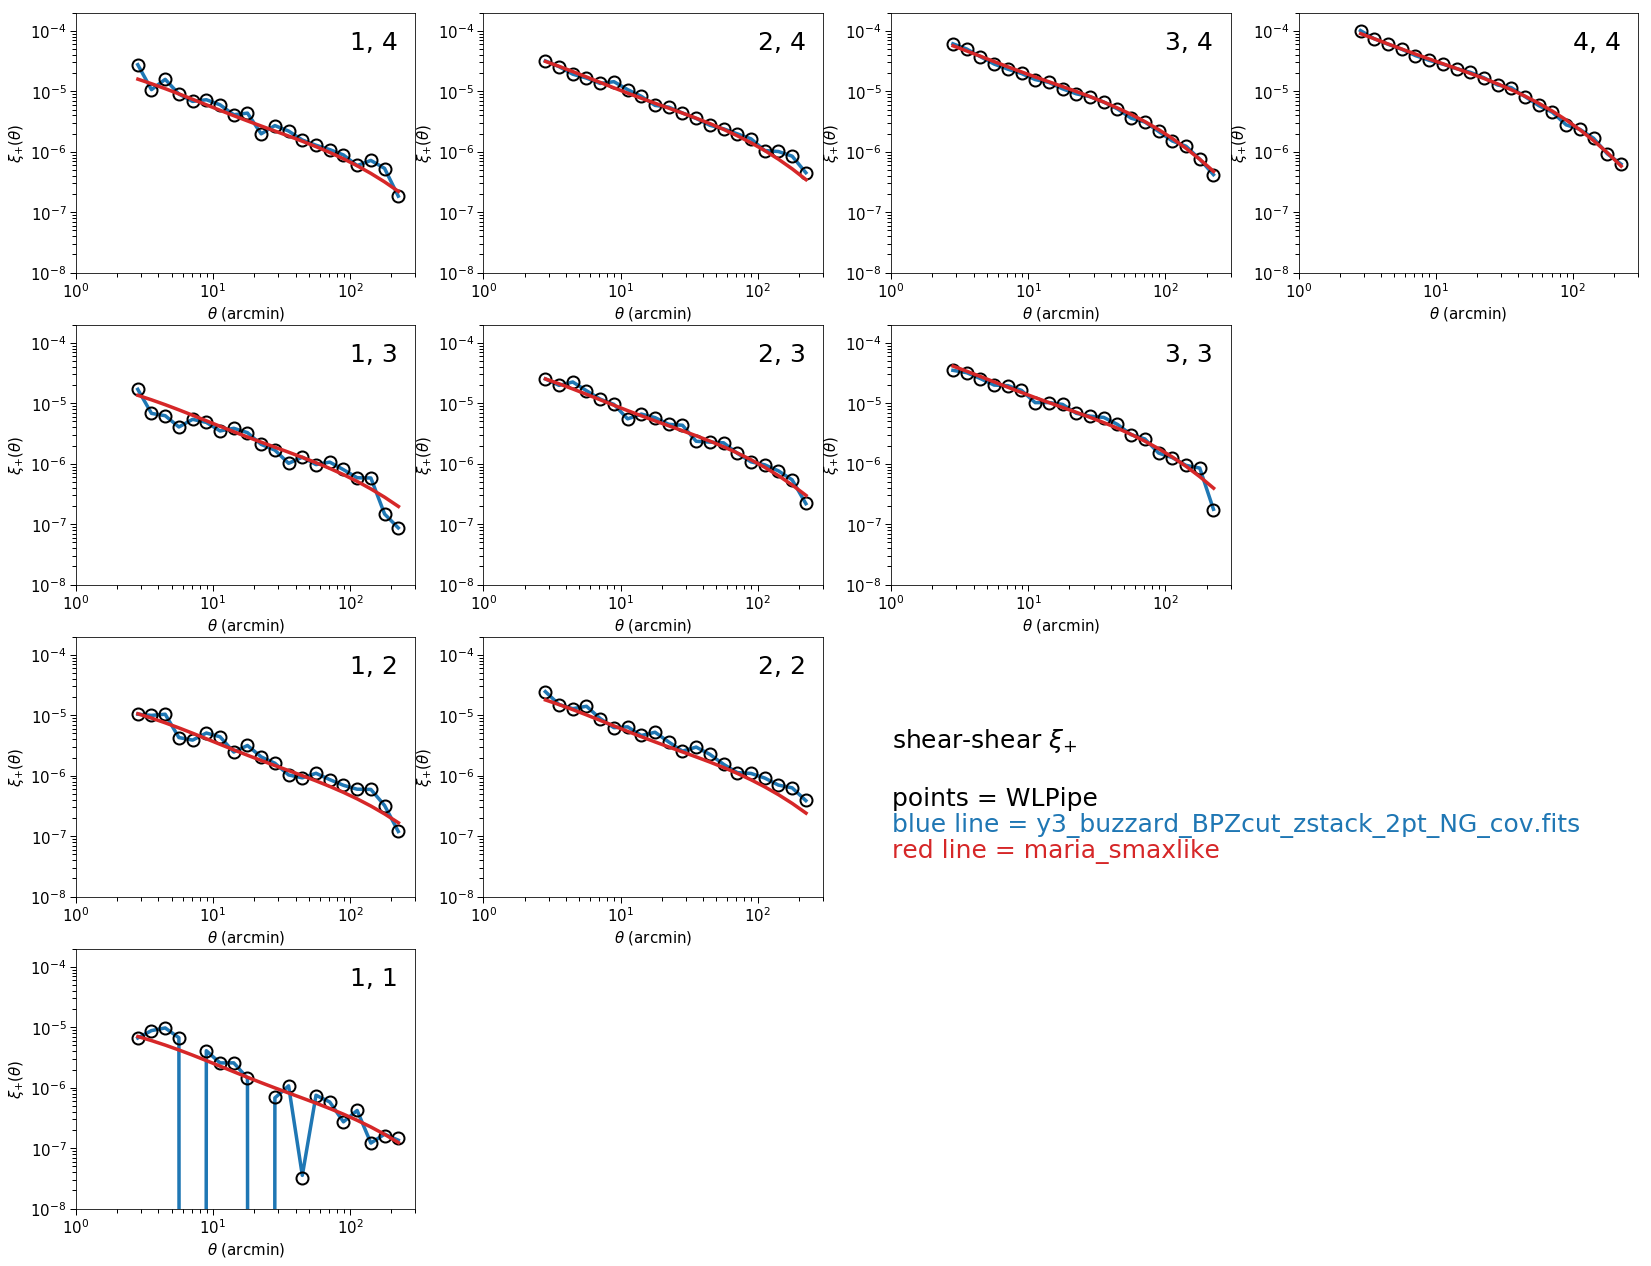

In [29]:
# Plotting xip, bin1==bin2
y3buzz_xip_dvect, xip_bin1, _ = get_fits(desy3buzz_outpath, desy3buzz_filename, 2)
wl_xip_dvect, _, _ = get_fits(wlpipe_outpath, wlpipe_filename, 2)

th_xip_dvect, _, _ = get_fits(wlpipe_outpath, th_filename, 1)
th2_xip_dvect, _, _ = get_fits(wlpipe_outpath, th2_filename, 1)
    
xi_nrow = len(xip_bin1)
xi_nidx = [1,2,3,4,5,6,7,9,10,11,13]
xi_binning = [(0,3), (1,3), (2,3), (3,3), (0,2), (1,2), (2,2), (0,1), (1,1), (0,0), (0,0)]

cov_xip = desy3buzz_cov[0:200, 0:200]

plot_xi(y3buzz_xip_dvect, wl_xip_dvect, xip_bin1, xi_nrow, xi_nidx, xi_binning, r'$\xi_{+}(\theta)$',
        r'shear-shear $\xi_{+}$'+'\n\n'+'points = WLPipe'+'\n', 'desy3buzz_xip_sims_Jim.png', cov_xip, 
        None, th_xip_dvect, th2_xip_dvect) #WLpipe # #'black line = maria_smaxlike'+'\n'


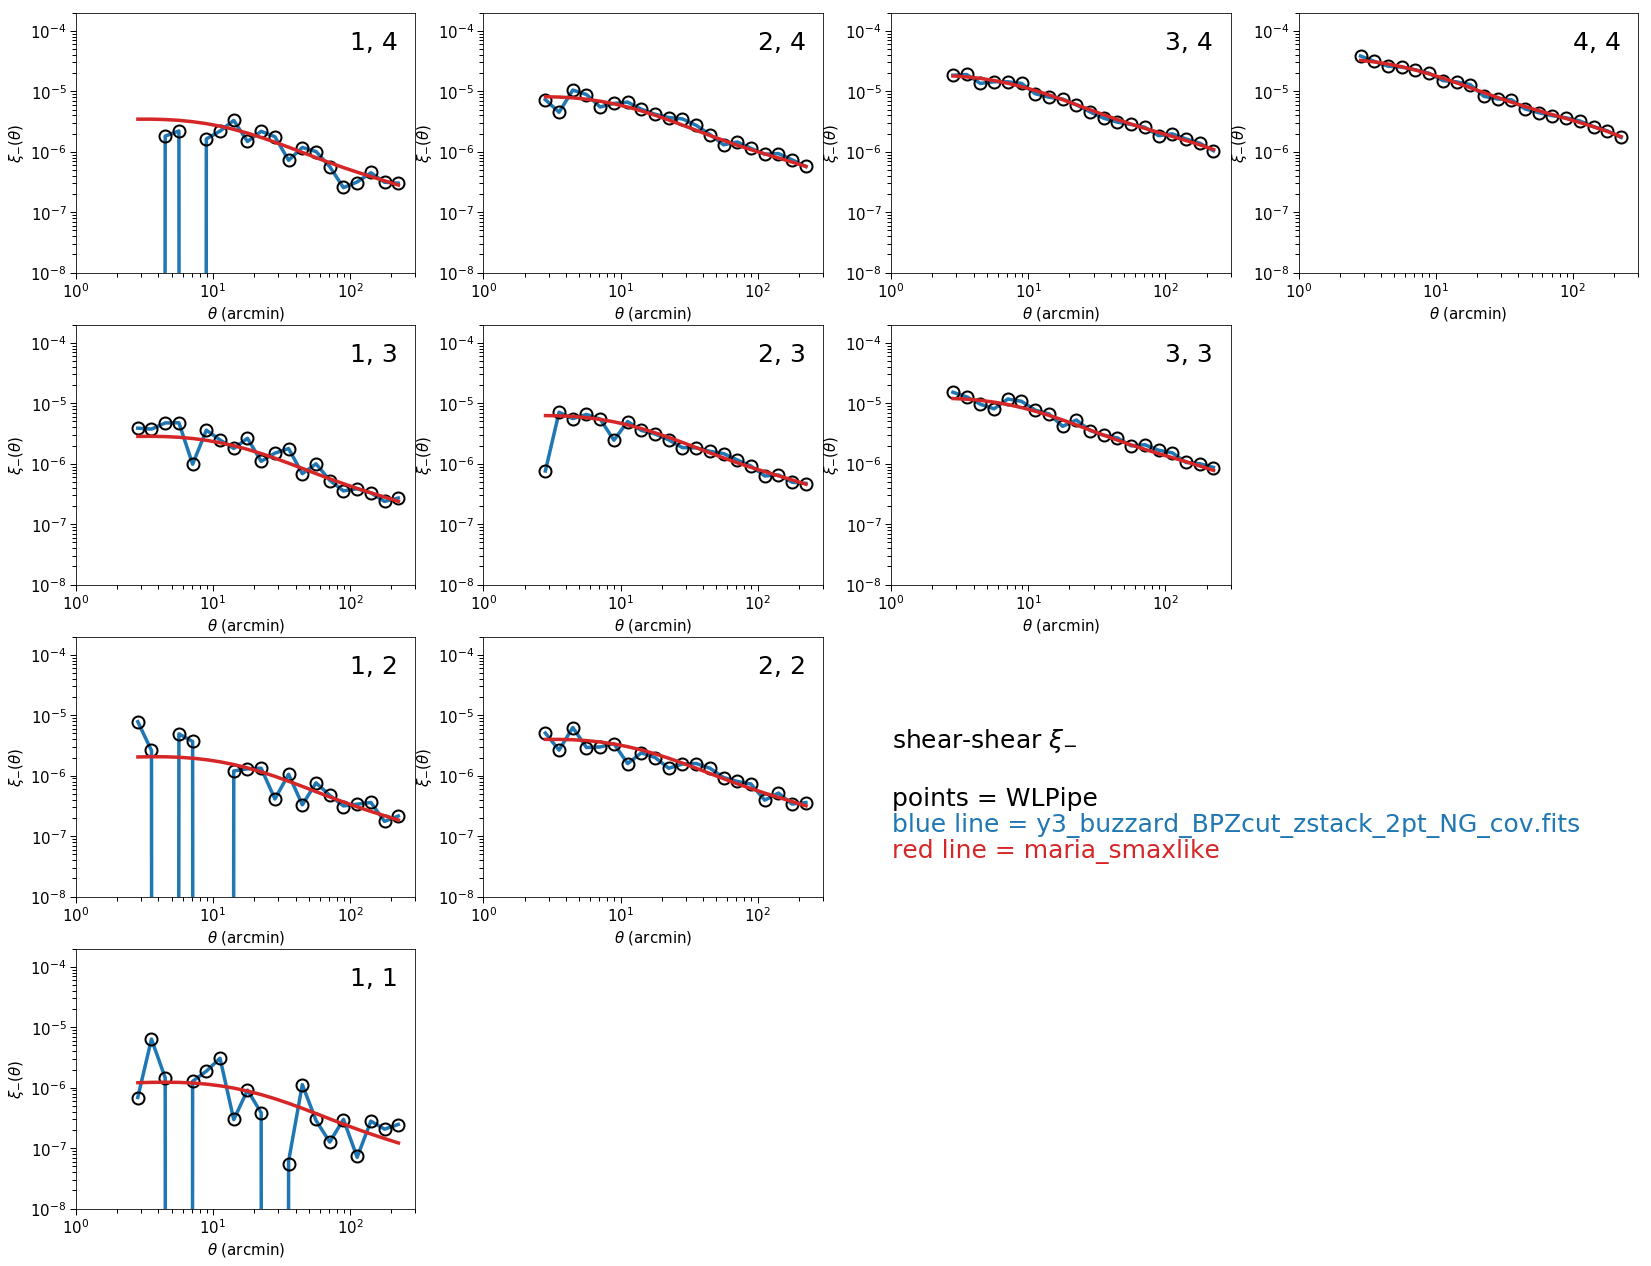

In [30]:
# Plotting xim, bin1==bin2
y3buzz_xim_dvect, xim_bin1, _ = get_fits(desy3buzz_outpath, desy3buzz_filename, 3)
wl_xim_dvect, _, _ = get_fits(wlpipe_outpath, wlpipe_filename, 3)

th_xim_dvect, _, _ = get_fits(wlpipe_outpath, th_filename, 2) #note: starts wit a different hdu!
th2_xim_dvect, _, _ = get_fits(wlpipe_outpath, th_filename, 2)

cov_xim = desy3buzz_cov[200:400, 200:400]

plot_xi(y3buzz_xim_dvect, wl_xim_dvect, xim_bin1, xi_nrow, xi_nidx, xi_binning, r'$\xi_{-}(\theta)$',
r'shear-shear $\xi_{-}$'+'\n\n'+'points = WLPipe'+'\n', 'desy3buzz_xim_sims_Jim.png', cov_xim, None, 
        th_xim_dvect, th2_xim_dvect) #WLPipe

#plot_xi(y3buzz_xim_dvect, wl_xim_dvect, xim_bin1, xi_nrow, xi_nidx, xi_binning, r'$\xi_{-}(\theta)$',
#        r'shear-shear $\xi_{-}$'+'\n\n'+'black line = maria_smaxlike'+'\n', 'desy3buzz_xim_sims.png', cov_xim, 
#        None, th_xim_dvect, th2_xim_dvect) #WLpipe



In [31]:
def get_gammat_values(dvect, idxs):
    """
    Get the :math:`\\gamma_t` values for each tomographic bin.
    """
    idx1, idx2 = idxs
    msk   = (dvect['BIN1']==idx1)&(dvect['BIN2']==idx2)
    ang   = dvect['ANG'][msk]
    value = dvect['VALUE'][msk]
    theta_gammat = value*ang*1e2
    rbin = (idx1, idx2)
    return ang, theta_gammat, rbin


def plot_gammat(dvect1, dvect2, nrow, ncol, nidx, bins, ylabel, outname, dvect3, dvect4):
    """
    Plot the comparison of :math:`\\theta\\gamma_t` (in units of :math:`10^{-2}`
    arcmin) between the :code:`2pt_pipeline` and :code:`WLpipe` on DES Y1 data.
    """
    plt.figure(1, figsize=(38,22))
    for i in range(len(bins)):
        angle1, value1, rbin = get_gammat_values(dvect1, bins[i])
        angle2, value2, rbin = get_gammat_values(dvect2, bins[i]) 
        angle3, value3, rbin3 = get_gammat_values(dvect3, bins[i])
        angle4, value4, rbin4 = get_gammat_values(dvect4, bins[i])
        
        plt.subplot(nrow, ncol, nidx[i])     # two row, two columns, position 1
        plt.plot(angle1, value1, lw=3.5, c='C0')    
        plt.plot(angle2, value2, 'ko', mew=2, ms=12, mfc='None') 
        plt.plot(angle3, value3, lw=3.5, c='C3', ls='-')
        #plt.plot(angle4, value4, lw=4.5, c='k', ls='--')#, dashes=(5, 5))
        plt.axhline(y=0, color='k', linestyle='--')
        plt.xlim(1e0, 450)
        plt.ylim(-0.5, 2.0)
        ##plt.yscale('log', nonposy='mask')
        plt.xscale('log', nonposx='mask')
        plt.text(2.0, 1.5,'%d, %d'%(rbin[0],rbin[1]), fontsize=25)
        plt.xlabel(r'$\theta$' + ' (arcmin)', fontsize=15)
        plt.ylabel(ylabel, fontsize=15) #(r'$\xi_{+}(\theta)$', fontsize=15)
        plt.tick_params(which='major', length=6, width=1, labelsize=15)
        plt.tick_params(which='minor', length=4, width=1)
    plt.savefig(outname, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()


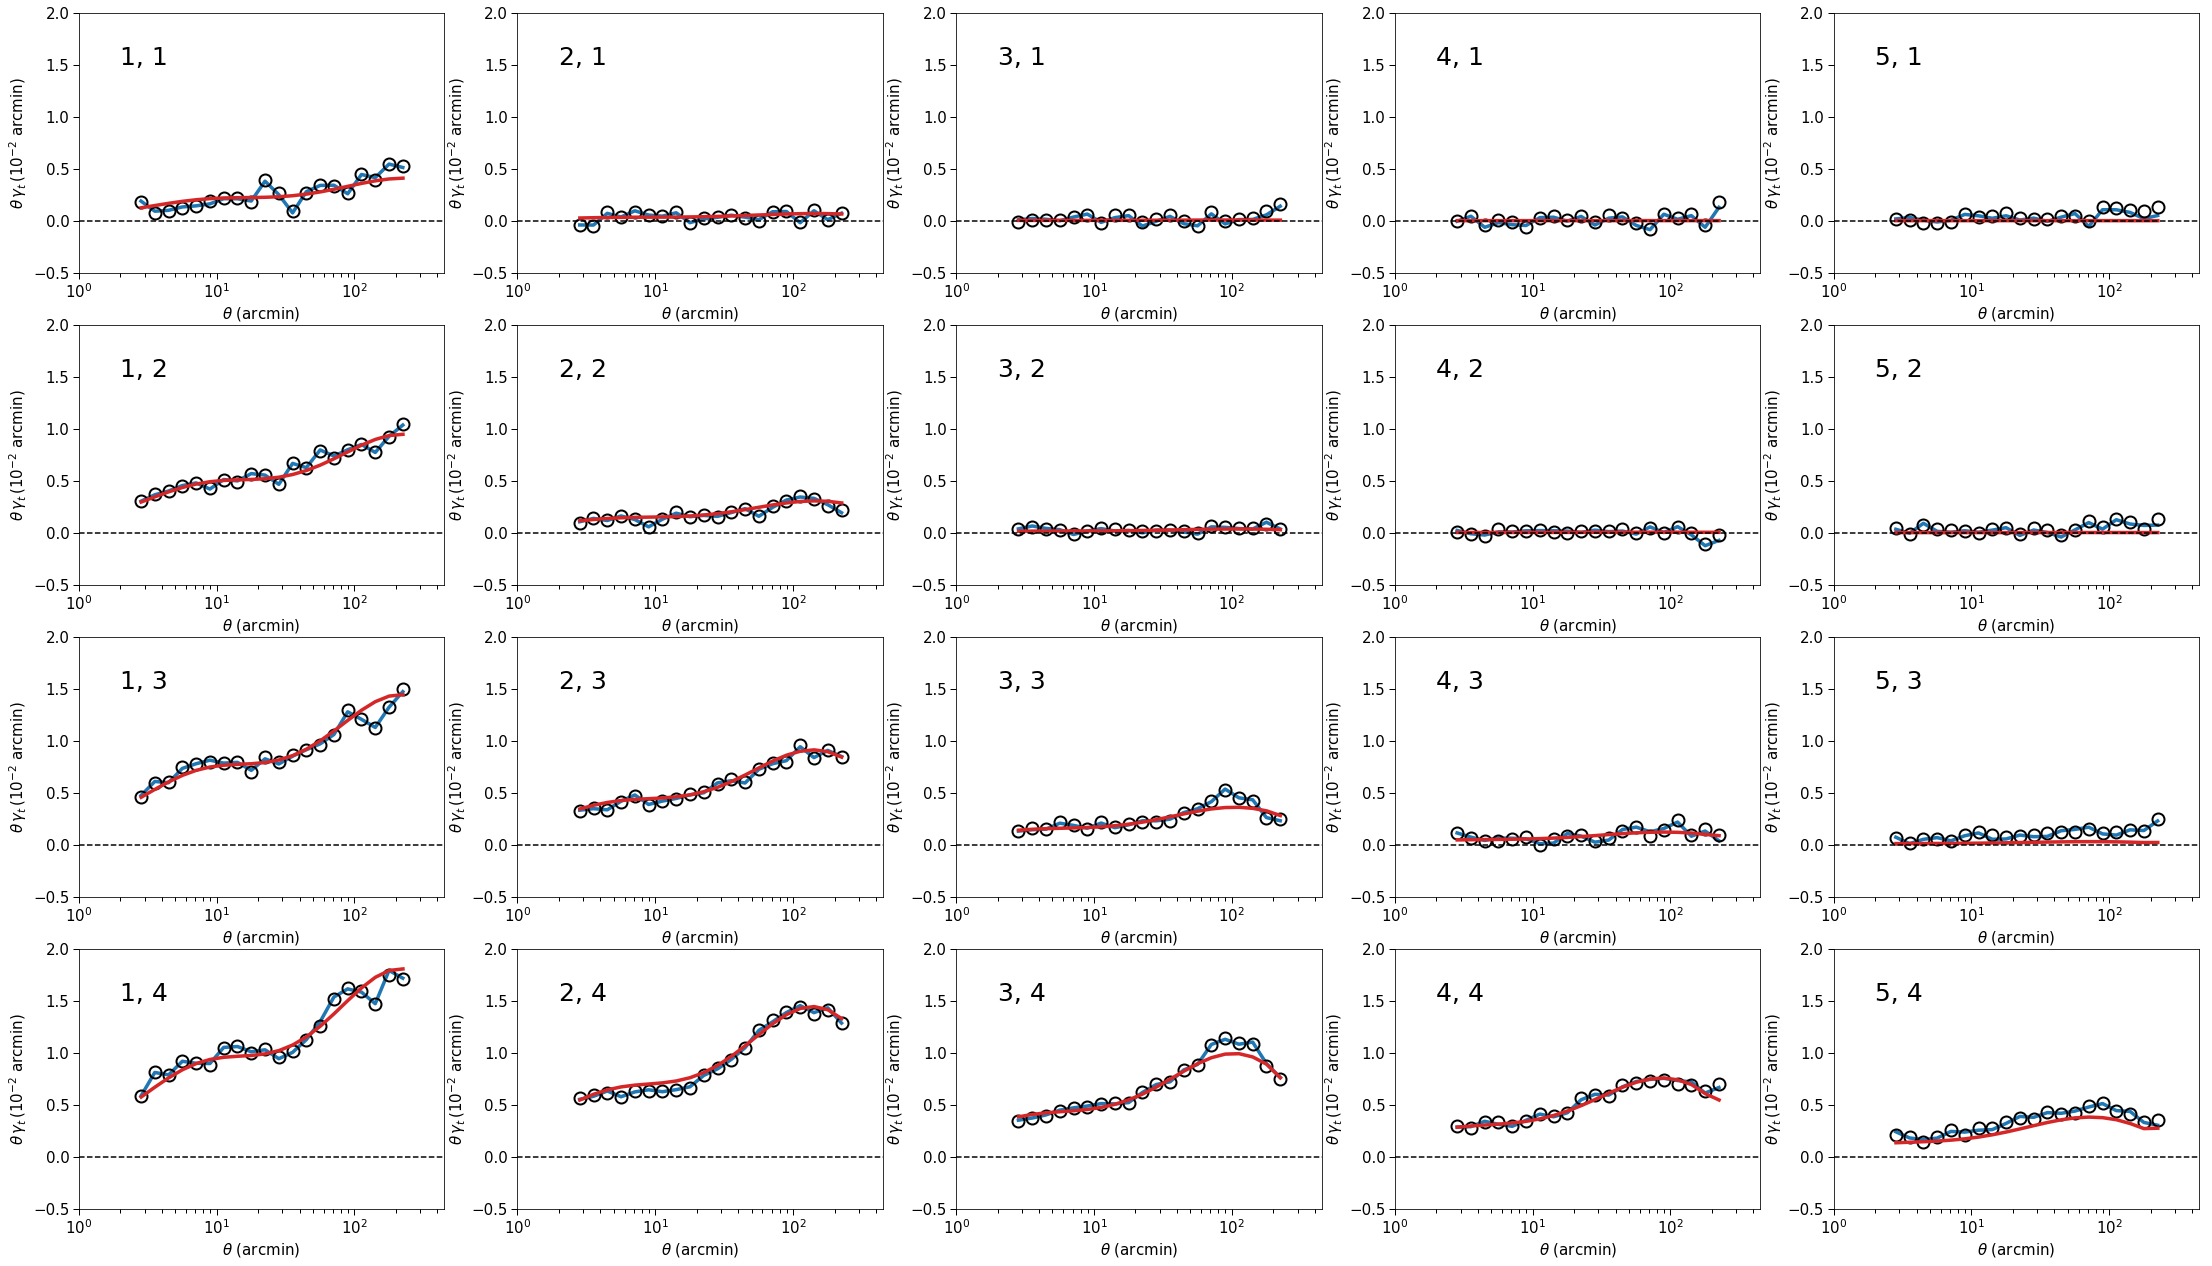

In [34]:
# Plotting gammat, bin1!=bin2
y3buzz_gammat_dvect, gammat_bin1, gammat_bin2 = get_fits(desy3buzz_outpath, desy3buzz_filename, 4)
wl_gammat_dvect, _, _ = get_fits(wlpipe_outpath, wlpipe_filename, 4)
gammat_ncol = len(gammat_bin1)
gammat_nrow = len(gammat_bin2)
gammat_nidx = range(1,21)
gammat_binning = []
for i in range(1,5):
    for j in range(1,6):
        gammat_binning.append((j,i))

th_gammat_dvect, _, _ = get_fits(wlpipe_outpath, th_filename, 3) #4) #pay attetion to the hdu number, is diff        
th2_gammat_dvect, _, _ = get_fits(wlpipe_outpath, th2_filename, 3) #3

plot_gammat(y3buzz_gammat_dvect, wl_gammat_dvect, gammat_nrow, gammat_ncol, gammat_nidx, gammat_binning,
            r'$\theta \, \gamma_{t}\,$'+r'($10^{-2}$ arcmin)', 'desy3buzz_gammat_sims_Jim.png', th_gammat_dvect,
           th2_gammat_dvect)


In [35]:
def get_w_values(dvect, idxs):
    """
    Get the w values for each tomographic bin.
    """
    idx1, idx2 = idxs
    msk   = (dvect['BIN1']==idx1)&(dvect['BIN2']==idx2)
    ang   = dvect['ANG'][msk]
    value = dvect['VALUE'][msk]
    theta_w = value*ang
    rbin = (idx1, idx2)
    return ang, theta_w, rbin

def plot_w(dvect1, dvect2, nrow, ncol, nidx, bins, ylabel, legend, outname, dvect3, dvect4):
    """
    Plot the comparison of :math:`\\theta w` (in units of arcmin) between the
    :code:`2pt_pipeline` and :code:`WLpipe` on DES Y1 data.
    """
    plt.figure(1, figsize=(22,20))
    for i in range(len(bins)):
        angle1, value1, rbin = get_w_values(dvect1, bins[i])
        angle2, value2, _ = get_w_values(dvect2, bins[i])
        angle3, value3, _ = get_w_values(dvect3, bins[i])
        angle4, value4, _ = get_w_values(dvect4, bins[i])

        
        
        plt.subplot(nrow, ncol, nidx[i])     # two row, two columns, position 1
        if nidx[i]==6:
            plt.axis('off')
            plt.xlim(1e0, 450)
            plt.ylim(-0.5, 3.0)
            plt.text(2.5, 1.5, legend, fontsize=25)
            plt.text(2.5, 1.2, 'blue line = y3_buzzard_BPZcut_zstack_2pt_NG_cov.fits\n', color='C0', fontsize=25)
            #plt.text(2.5, 1.1, 'red line: buzzard_y3_3x2_th_new.fits', color='C3', fontsize=25)
            #plt.text(2.5, 1.2, 'blue line = buzzard_y3_3x2_th_new.fits\n', color='C0', fontsize=25)
            plt.text(2.5, 1.1, 'red line = maria_smaxlike', color='C3', fontsize=25)



        else:
            plt.plot(angle1, value1, lw=3.5, c='C0')    # y1
            plt.plot(angle2, value2, 'ko', mew=2, ms=12, mfc='None')
            plt.plot(angle3, value3, lw=3.5, c='C3', ls='-')  
            #plt.plot(angle4, value4, lw=4.5, c='k', ls='--')#, dashes=(5, 5)) 
            plt.axhline(y=0, color='k', linestyle='--')
            plt.xlim(1e0, 450)
            plt.ylim(-0.5, 3.05)
            plt.xscale('log', nonposx='mask')
            plt.text(2.5, 2.5,'%d'%(rbin[0]), fontsize=25)
            plt.xlabel(r'$\theta$' + ' (arcmin)', fontsize=15)
            plt.ylabel(ylabel, fontsize=15) #(r'$\xi_{+}(\theta)$', fontsize=15)
            plt.tick_params(which='major', length=6, width=1, labelsize=15)
            plt.tick_params(which='minor', length=4, width=1)
    plt.savefig(outname, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()        

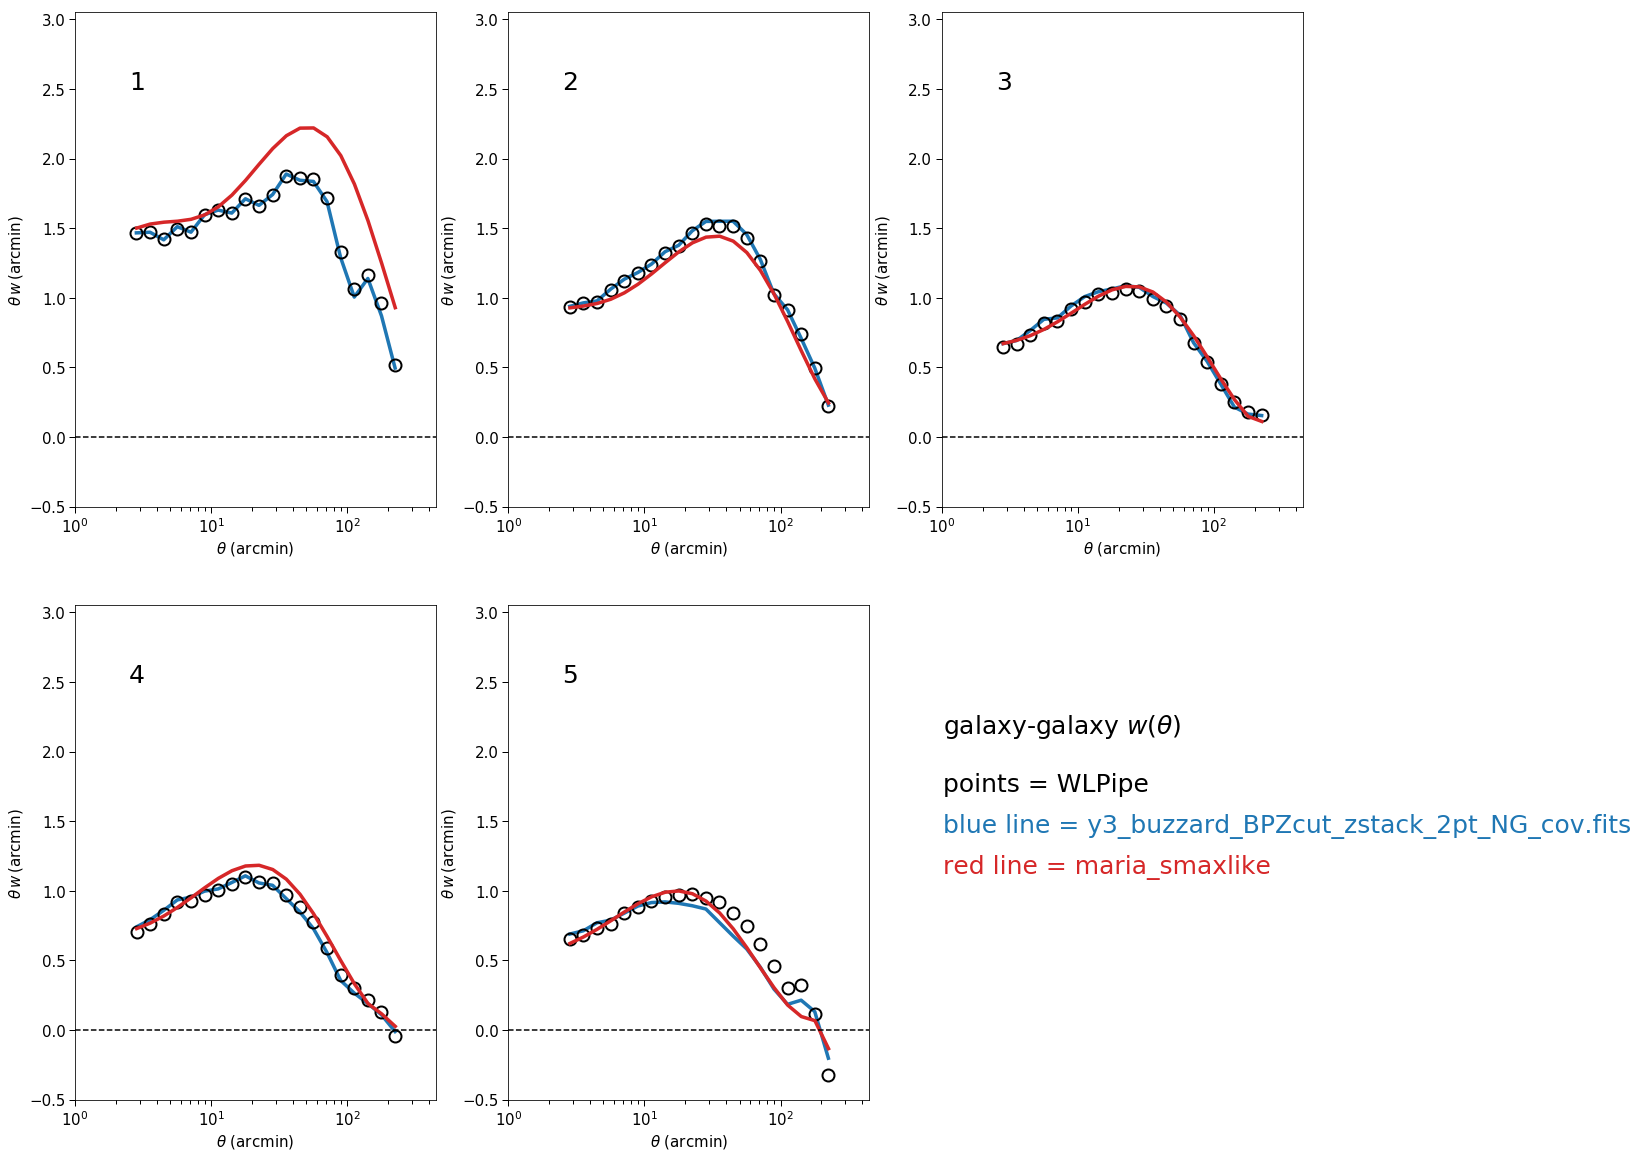

In [36]:
# Plotting w, bin1==bin2
y3buzz_w_dvect, w_bin1, _ = get_fits(desy3buzz_outpath, desy3buzz_filename, 5)
wl_w_dvect, _, _ = get_fits(wlpipe_outpath, wlpipe_filename, 5)
w_nrow = 2
w_ncol = 3
w_binning = [(i,i) for i in range(1,6)] + [(5,5)]
w_nidx = range(1,7)

th_w_dvect, _, _ = get_fits(wlpipe_outpath, th_filename, 4) #4) #3
th2_w_dvect, _, _ = get_fits(wlpipe_outpath, th2_filename, 4)

plot_w(y3buzz_w_dvect, wl_w_dvect, w_nrow, w_ncol, w_nidx, w_binning, r'$\theta \,w \,$'+r'(arcmin)',
       r'galaxy-galaxy $w(\theta)$'+'\n\n'+'points = WLPipe'+'\n', 'desy3buzz_w_sims_Jim.png', th_w_dvect,
       th2_w_dvect) #WLPipe

#plot_w(y3buzz_w_dvect, wl_w_dvect, w_nrow, w_ncol, w_nidx, w_binning, r'$\theta \,w \,$'+r'(arcmin)',
#       r'galaxy-galaxy $w(\theta)$'+'\n\n'+'black line = maria_smaxlike'+'\n', 'desy3buzz_w_sims.png', th_w_dvect,
#       th2_w_dvect) #WLPipe


In [23]:
def get_nz_values(dvect):
    """
    Get the n(z) distribution for each tomographic bin of the
    lens and source samples.
    """
    zlow  = dvect['Z_LOW']
    zmid  = dvect['Z_MID']
    zhigh = dvect['Z_HIGH']
    bin1  = dvect['BIN1']
    bin2  = dvect['BIN2']
    bin3  = dvect['BIN3']
    bin4  = dvect['BIN4']
    try:
         bin5  = dvect['BIN5']
    except KeyError:
         bin5 = None
    return zlow, zmid, zhigh, bin1, bin2, bin3, bin4, bin5

def plot_nz(nzs1, zs1, nzl1, zl1, nzs2, zs2, nzl2, zl2, nrow, ncol, outname):
    """
    Plot the comparison of n(z) of lens and sources between the
        :code:`2pt_pipeline` and :code:`WLpipe` on DES Y1 data.
    """
    plt.figure(1, figsize=(20,14))
    for i in range(nrow):
        plt.subplot(nrow, ncol, i+1)     # two row, two columns, position 1
        plt.xlabel('z', fontsize=20)
        plt.ylabel('n(z)', fontsize=20) 
        plt.tick_params(which='both', length=6, width=1, labelsize=15)
        if i+1==1:
            plt.plot(zs2, nzs2[0], 'o', mew=2, ms=5, mfc='C0')
            plt.plot(zs2, nzs2[1], 'o', mew=2, ms=5, mfc='C1')
            plt.plot(zs2, nzs2[2], 'o', mew=2, ms=5, mfc='C2')
            plt.plot(zs2, nzs2[3], 'o', mew=2, ms=5, mfc='C3')
            plt.plot(zs1, nzs1[0], lw=2, c='C0')    
            plt.plot(zs1, nzs1[1], lw=2, c='C1')
            plt.plot(zs1, nzs1[2], lw=2, c='C2')
            plt.plot(zs1, nzs1[3], lw=2, c='C3')
            plt.xlim(0, 2)
            plt.ylim(0, 5)
            plt.text(1.2, 4, 'points = WLpipe\nlines = y3_buzzard_BPZcut_zstack_2pt_NG_cov.fits', fontsize=15)
            #plt.text(1.2, 4, 'points = WLpipe\nlines = buzzard_y3_3x2_th_new.fits', fontsize=15)            
            plt.title('source redshifts', fontsize=15)


        elif i+1==2:
            plt.plot(zl2, nzl2[0], 'o', mew=2, ms=5, mfc='C0') #mfc='None'
            plt.plot(zl2, nzl2[1], 'o', mew=2, ms=5, mfc='C1')
            plt.plot(zl2, nzl2[2], 'o', mew=2, ms=5, mfc='C2')
            plt.plot(zl2, nzl2[3], 'o', mew=2, ms=5, mfc='C3')
            plt.plot(zl2, nzl2[4], 'o', mew=2, ms=5, mfc='C4')
            plt.plot(zl1, nzl1[0], lw=2, c='C0')    
            plt.plot(zl1, nzl1[1], lw=2, c='C1')
            plt.plot(zl1, nzl1[2], lw=2, c='C2')
            plt.plot(zl1, nzl1[3], lw=2, c='C3')
            plt.plot(zl1, nzl1[4], lw=2, c='C4')
            plt.xlim(0, 1)
            plt.ylim(0, 10)
            plt.text(0.6, 8, 'points = WLPipe\nlines = y3_buzzard_BPZcut_zstack_2pt_NG_cov.fits', fontsize=15)
            #plt.text(0.6, 8, 'points = WLPipe\nlines = buzzard_y3_3x2_th_new.fits', fontsize=15)            
            plt.title('lens redshifts', fontsize=15)
    plt.savefig(outname, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()            

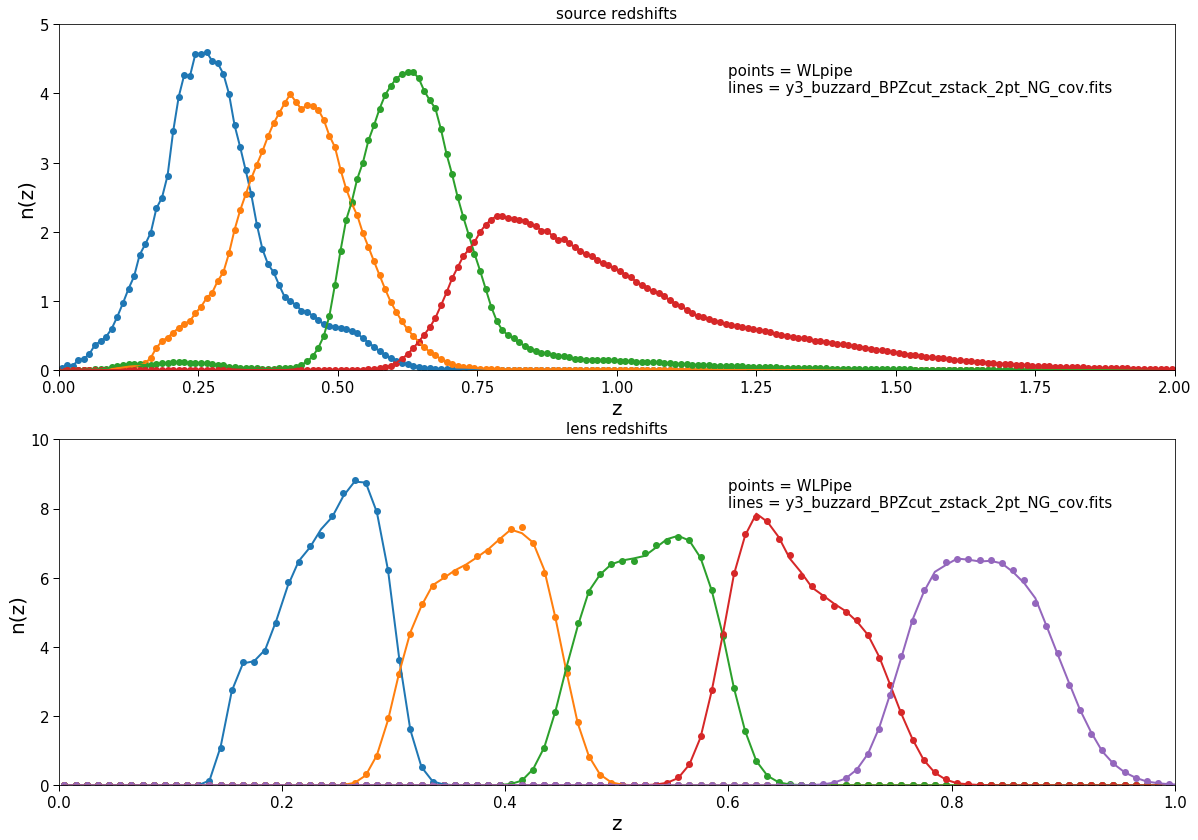

In [24]:
# Getting nz_source, bin1==bin2
y3buzz_nzsource_dvect, nzsource_bin1, _ = get_fits(desy3buzz_outpath, desy3buzz_filename, 6)
#y3buzz_nzsource_dvect, nzsource_bin1, _ = get_fits(desy3buzz_outpath, th_filename, 5)
wl_nzsource_dvect, _, _ = get_fits(wlpipe_outpath, wlpipe_filename, 6)

# Getting nz_lens, bin1==bin2
y3buzz_nzlens_dvect, nzlens_bin1, _ = get_fits(desy3buzz_outpath, desy3buzz_filename, 7)
#y3buzz_nzlens_dvect, nzlens_bin1, _ = get_fits(desy3buzz_outpath, th_filename, 6)
wl_nzlens_dvect, _, _ = get_fits(wlpipe_outpath, wlpipe_filename, 7)

# Plotting n(z)
y3buzz_zs1, y3buzz_zs2, y3buzz_zs3, y3buzz_bs1, y3buzz_bs2, y3buzz_bs3, y3buzz_bs4, y3buzz_bs5 = get_nz_values(y3buzz_nzsource_dvect)
y3buzz_zl1, y3buzz_zl2, y3buzz_zl3, y3buzz_bl1, y3buzz_bl2, y3buzz_bl3, y3buzz_bl4, y3buzz_bl5 = get_nz_values(y3buzz_nzlens_dvect)

wl_zs1, wl_zs2, wl_zs3, wl_bs1, wl_bs2, wl_bs3, wl_bs4, wl_bs5 = get_nz_values(wl_nzsource_dvect)
wl_zl1, wl_zl2, wl_zl3, wl_bl1, wl_bl2, wl_bl3, wl_bl4, wl_bl5 = get_nz_values(wl_nzlens_dvect)

plot_nz([y3buzz_bs1, y3buzz_bs2, y3buzz_bs3, y3buzz_bs4], y3buzz_zs2, [y3buzz_bl1, y3buzz_bl2, y3buzz_bl3, y3buzz_bl4, y3buzz_bl5], y3buzz_zl2,
        [wl_bs1, wl_bs2, wl_bs3, wl_bs4], wl_zs2, [wl_bl1, wl_bl2, wl_bl3, wl_bl4, wl_bl5], wl_zl2,
        2, 1, 'desy3buzz_dndz_sims.png')
